# Cluster Scoring

Each of the scoring metrics described below are used in unsupervised learning to analyze how well groups of data have been assigned to clusters. The metrics measure the intra-cluster similarity (cohesion) and inter-cluster differences (separation) of data. It is therefore preferred that clusters are well-spaced and densely packed.

In [1]:
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:   .p.import`matplotlib.pyplot
fcps:  .p.import[`pyclustering.samples.definitions]`:FCPS_SAMPLES
read:  .p.import[`pyclustering.utils]`:read_sample
pydb:  .p.import[`sklearn.metrics]`:davies_bouldin_score
pysil: .p.import[`sklearn.metrics]`:silhouette_score
pydunn:.p.import[`jqmcvi.base]`:dunn_fast /https://github.com/jqmviegas/jqm_cvi

### Dataset 1

6 859616


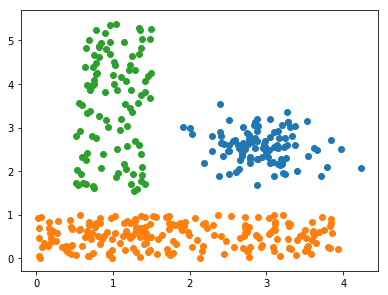

In [2]:
d1:read[fcps`:SAMPLE_LSUN]`
\ts r1:.ml.clust.dbscan[d1;`e2dist;5;.3]
{plt[`:scatter][;]. flip x}each exec pts by clt from r1;
plt[`:show][];

### Dataset 2

1519 263168


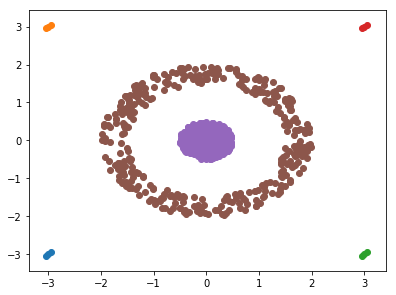

In [3]:
d2:read[fcps`:SAMPLE_TARGET]`
\ts r2:.ml.clust.hc[d2;6;`edist;`single;0b]
{plt[`:scatter][;]. flip x}each exec pts by clt from r2;
plt[`:show][];

---

### Davies-Bouldin index
- Minimum of zero, where lower values indicate better clustering.

In [4]:
/
/Davies-Bouldin index - euclidean only
/* n = number of clusters, a = centroid, p = points per cluster 
/* s = sigma, avg intracluster distances
/* c = intercluster distances between centroids
/* db index = (1/n)*sum(sigma i+sigma j)/d(ci,cj)
dbindex:{
 n:count a:avg each p:value exec pts by clt from x;
 s:avg each scdist[`edist]'[p;a];
 dm:scdist[`edist;a]each a;
 (sum dbi[s;dm;t]each t:til n)%n}

/euclidean distance
scdist:{.ml.clust.i.dd[x]each y-\:z}

/dbindex given inter/intra cluster distances
dbi:{[s;c;x;y]
 m:@[;where x<>y]x,\:y;
 max{%[(+). x z;y[;]. z]}[s;c]each m}

In [5]:
/q
.ml.clust.dbindex[r1]

/python
pydb[d1;r1`clt]`

0.7135955


/home/mlteam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


0.7135955


In [6]:
/q
.ml.clust.dbindex[r2]

/python
pydb[d2;r2`clt]`

11.22878


/home/mlteam/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mlteam/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


11.22878


---

### Dunn index
- Minimum value of 0, where higher values indicate better clustering.

In [7]:
/
/Dunn Index - any df
/* calc intracluster distances and find max overall
/* calc intercluster distances and find min overall
/* return dunn index = min inter dist/max intra dist
dunn:{
 t:til count p:value exec pts by clt from x;
 mn:(min/)dinter[y;p;t]each t;
 mx:max(max/)each{scdist[y;x]each x}[;y]each p;
 mn%mx}

/intercluster distances
dinter:{[df;p;t;i](min/)each{j:y[z];scdist[x;j 0]each j 1}[df;p]each@[;where t<>i]t,\:i}

In [8]:
/q
.ml.clust.dunn[r1;`edist]

/python 
pydunn[r1`pts;raze r1`clt]`

0.1476865


0.1476865


In [9]:
/q
.ml.clust.dunn[r2;`edist]

/python
pydunn[r2`pts;raze r2`clt]`

0.2532991


0.2532991


---

### Silhouette coefficient
A score near:
- +1 indicates correct clustering, with well separated data
- 0 indicates that clusters are close to each other, if not overlapping
- -1 indicates incorrect clustering, possibly with too many clusters have been created

In [10]:
/
/Silhouette coefficient for entire dataset - any df
silhouette:{t:til count p:value exec pts by clt from x;avg raze silc[y;p;t]'[p;t]}

/Silhouette coefficient for each cluster
silc:{[df;p;t;pcl;icl]k:1%count[pcl]-1;silp[df;p;t;pcl;icl;k]each pcl}

/Silhouette coefficient for single point
/* For each point j:
/*  - a = dist to all points in clust J
/*  - b = dist to all points in clust K, L, etc. and take the average of each and the minimum overall
/*  - sil score = (b-a)/max(a;b)
silp:{[df;p;t;pcl;icl;k;j]
 a:k*sum{x where 0<>x}scdist[df;pcl;j];
 b:min avg each scdist[df;;j]each p t except icl;
 (b-a)%max(a;b)}

In [11]:
/q
.ml.clust.silhouette[r1;`edist]

/python
pysil[d1;raze r1`clt]`

0.4758694


0.4758694


In [12]:
/q
.ml.clust.silhouette[r2;`edist]

/python
pysil[d2;raze r2`clt]`

0.2952083


0.2952083


### Separation Index

The seperation score is used to compare clustering models to decide which parameters are most efficient. The higher the score, the better the clustering model is. There is no maximum value to this score.

In [13]:
.ml.clust.sepIdx[r2;`e2dist]

0.06416045


We now use the same clustering dataset and change the distance and linkage metric to compare which parameters cluster better

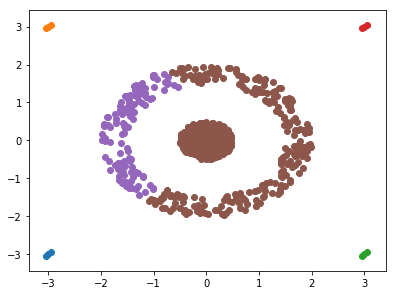

In [14]:
r3:.ml.clust.hc[d2;6;`mdist;`centroid;0b]
{plt[`:scatter][;]. flip x}each exec pts by clt from r3;
plt[`:show][];

In [15]:
.ml.clust.sepIdx[r3;`e2dist]

0.001649964


From the results we can see that the initial parameters of `e2dist` and `single` give better results